In [161]:
import pandas as pd
import numpy as np
import os

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import fetch_california_housing

In [163]:
import warnings


warnings.filterwarnings("ignore")

In [164]:
df = pd.read_csv(r"D:\Rohan\ML\Datasets\California Housing Prices\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [165]:
# latitude and longitude contain the coordinates of individual houses
# changing the column names to reflect that

df = df.rename(columns={"longitude": "longitude_house", "latitude": "latitude_house"})

df.head()

,longitude_house,latitude_house,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [166]:
df.columns.values

array(['longitude_house', 'latitude_house', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity'],
      dtype=object)

In [167]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [168]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["ocean_proximity"] = label_encoder.fit_transform(df["ocean_proximity"])

df.head()

,longitude_house,latitude_house,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [169]:
df.isnull().sum()

longitude_house         0
latitude_house          0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [170]:
# MICE imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0, max_iter=10)

columns_to_impute = ["total_bedrooms"]
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

df[columns_to_impute] = df[columns_to_impute].round().astype(int)

df.isnull().sum()

longitude_house       0
latitude_house        0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [171]:
np.set_printoptions(threshold=np.inf)
np.set_printoptions(
    precision=1, suppress=True
)  # precision=1 means numbers will be printed upto a decimal place

unique_values = df["total_bedrooms"].unique()
print(unique_values)

[ 129 1106  190  235  280  213  489  687  665  707  434  752  474  191
  626  283  347  293  455  298  184  367  541  337  437  123  244  421
  492  160  447  481  409  366  574  282  432  390  330  715  419  311
  202  420  322  312  195  375  453  456  853  243  288  335  341   43
  211   29  237  182  209  354  109  644  152  297  204    4  161  462
  562  374  176  289   56   97  164  143  451  348   42   78  392   87
   31  623 2477 1331  107 1270 1085 1414 1603  242  701 1914  225  482
  460  751  855 1098 1196  559  428  287 1750 1105  399  454  406   54
  411  365 1048  473  597  674  346  490  210  788  223  271  264  181
  534   38  333  436  605  535  212  465  464  339  536  486  229  402
  292  313  238  550  168  510  502  835 1065  792  469  864  526  188
  391  606  647  228  373  398  588  749  414  480  299 1344  395  431
  180  376  779  128  301  206  146  215  530  472  258  825  396  217
  145  199  314  690  575  450  711  307  557  500  499  263  259  256
  405 

In [172]:
df.head()

,longitude_house,latitude_house,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280,565.0,259.0,3.8462,342200.0,3


In [173]:
columns_to_scale = [
    "longitude_house",
    "latitude_house",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "median_house_value",
]
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,longitude_house,latitude_house,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975231,-0.974429,-0.977033,2.344766,2.129631,3
1,-1.322844,1.043185,-0.607019,2.045890,1.355085,0.861439,1.669961,2.332238,1.314156,3
2,-1.332827,1.038503,1.856182,-0.535746,-0.829735,-0.820777,-0.843637,1.782699,1.258693,3
3,-1.337818,1.038503,1.856182,-0.624215,-0.722402,-0.766028,-0.733781,0.932968,1.165100,3
4,-1.337818,1.038503,1.856182,-0.462404,-0.615070,-0.759847,-0.629157,-0.012881,1.172900,3


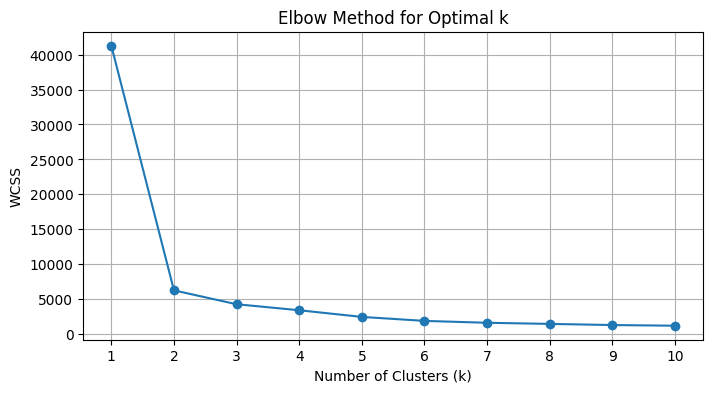

In [174]:
# we need to find clusters using longitude and latitude

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[["longitude_house", "latitude_house"]])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [175]:
# therefore, ideal value is k=3

kmeans = KMeans(n_clusters=3, random_state=0)

df["location_cluster"] = kmeans.fit_predict(df[["longitude_house", "latitude_house"]])
df.head()

,longitude_house,latitude_house,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,location_cluster
0,-1.327835,1.052548,0.982143,-0.804819,-0.975231,-0.974429,-0.977033,2.344766,2.129631,3,2
1,-1.322844,1.043185,-0.607019,2.045890,1.355085,0.861439,1.669961,2.332238,1.314156,3,2
2,-1.332827,1.038503,1.856182,-0.535746,-0.829735,-0.820777,-0.843637,1.782699,1.258693,3,2
3,-1.337818,1.038503,1.856182,-0.624215,-0.722402,-0.766028,-0.733781,0.932968,1.165100,3,2
4,-1.337818,1.038503,1.856182,-0.462404,-0.615070,-0.759847,-0.629157,-0.012881,1.172900,3,2


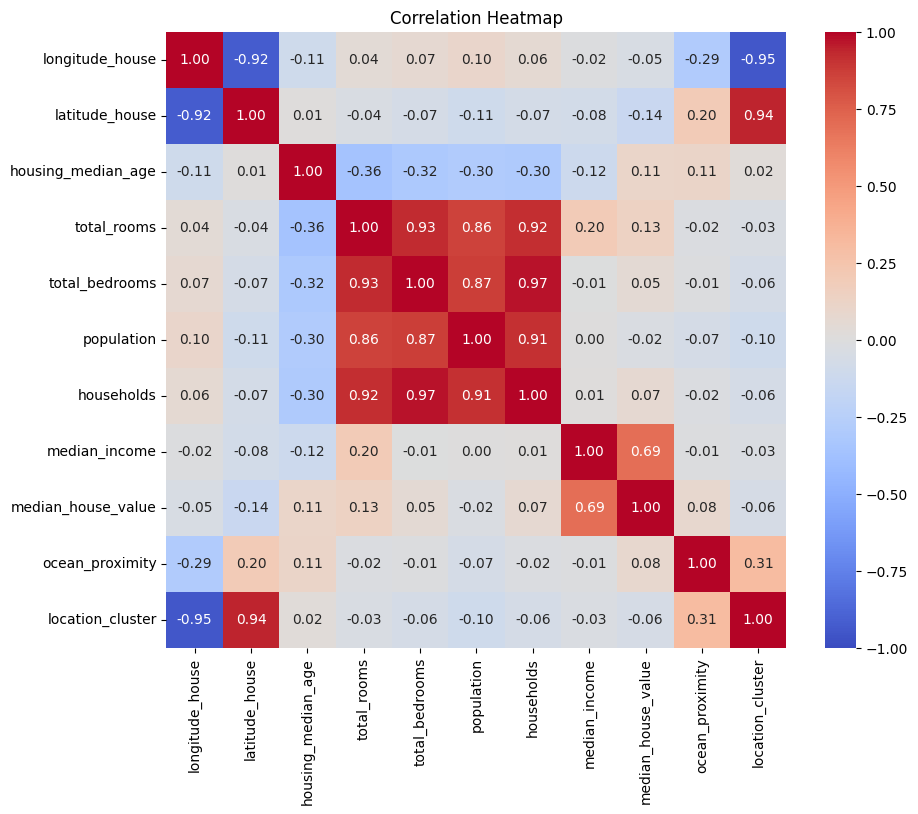

In [176]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [177]:
"""
longitude and latitude having -0.92 correlation means that they are constrained within a narrow range (the 
data is from a specific region)

location_cluster is related to longitude and latitude as it was derived from these 2 columns

1 household means 1 family.  total_rooms, total_bedrooms, population, households who are having high positive
correlation with each other in the heatmap. PCA is a dimensionality reduction technique that transforms correlated
features into a set of linearly uncorrelated components. It helps to reduce multicollinearity
"""

'\nlongitude and latitude having -0.92 correlation means that they are constrained within a narrow range (the \ndata is from a specific region)\n\nlocation_cluster is related to longitude and latitude as it was derived from these 2 columns\n\n1 household means 1 family.  total_rooms, total_bedrooms, population, households who are having high positive\ncorrelation with each other in the heatmap. PCA is a dimensionality reduction technique that transforms correlated\nfeatures into a set of linearly uncorrelated components. It helps to reduce multicollinearity\n'

In [178]:
df.columns.values

array(['longitude_house', 'latitude_house', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity',
       'location_cluster'], dtype=object)

In [179]:
columns_to_pca = ["total_rooms", "total_bedrooms", "population", "households"]
pca_features = df[["total_rooms", "total_bedrooms", "population", "households"]]

pca = PCA(n_components=1)  # Number of columns to keep
pca_features = pca.fit_transform(pca_features)

pca_df = pd.DataFrame(pca_features, columns=["PC1"])

df_reduced = df.drop(columns=columns_to_pca)

df = pd.concat([df_reduced, pca_df], axis=1)
df.head()

,longitude_house,latitude_house,housing_median_age,median_income,median_house_value,ocean_proximity,location_cluster,PC1
0,-1.327835,1.052548,0.982143,2.344766,2.129631,3,2,-1.866100
1,-1.322844,1.043185,-0.607019,2.332238,1.314156,3,2,2.972595
2,-1.332827,1.038503,1.856182,1.782699,1.258693,3,2,-1.516006
3,-1.337818,1.038503,1.856182,0.932968,1.165100,3,2,-1.422899
4,-1.337818,1.038503,1.856182,-0.012881,1.172900,3,2,-1.231890


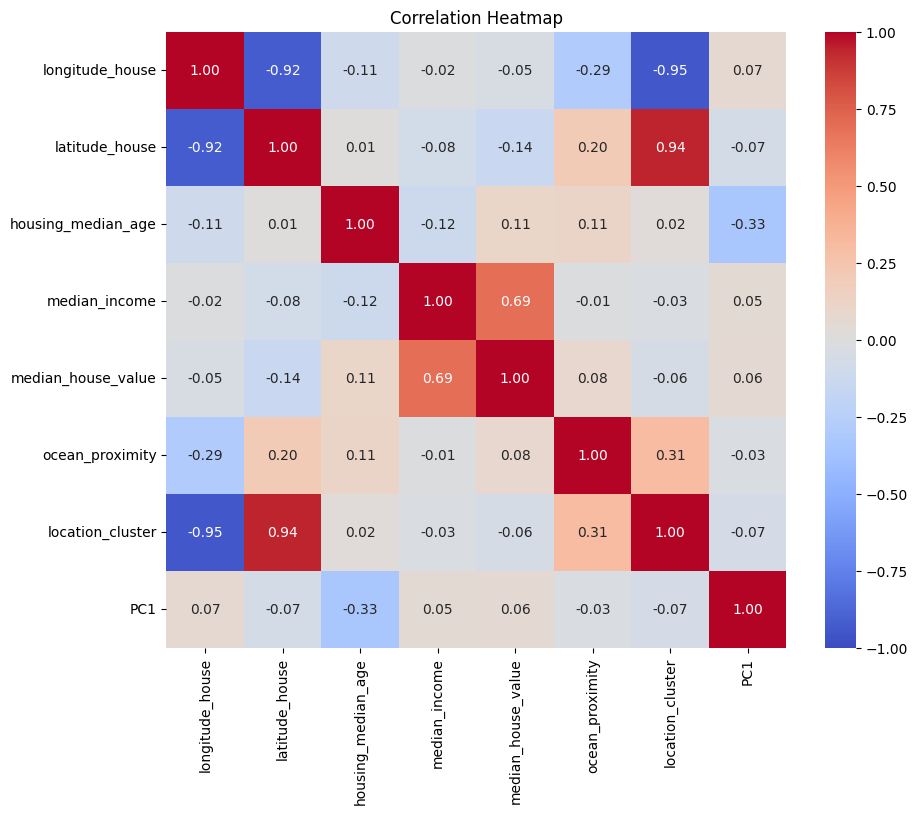

In [180]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [181]:
"""
we are going to use median_house_value as the target. so we don't need to use PCA to handle high collinearity between
median_income and median_house_value
"""

"\nwe are going to use median_house_value as the target. so we don't need to use PCA to handle high collinearity between\nmedian_income and median_house_value\n"

In [182]:
df.columns.values

array(['longitude_house', 'latitude_house', 'housing_median_age',
       'median_income', 'median_house_value', 'ocean_proximity',
       'location_cluster', 'PC1'], dtype=object)

In [183]:
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

X.head()

,longitude_house,latitude_house,housing_median_age,median_income,ocean_proximity,location_cluster,PC1
0,-1.327835,1.052548,0.982143,2.344766,3,2,-1.866100
1,-1.322844,1.043185,-0.607019,2.332238,3,2,2.972595
2,-1.332827,1.038503,1.856182,1.782699,3,2,-1.516006
3,-1.337818,1.038503,1.856182,0.932968,3,2,-1.422899
4,-1.337818,1.038503,1.856182,-0.012881,3,2,-1.231890


In [184]:
y.head()

0    2.129631
1    1.314156
2    1.258693
3    1.165100
4    1.172900
Name: median_house_value, dtype: float64

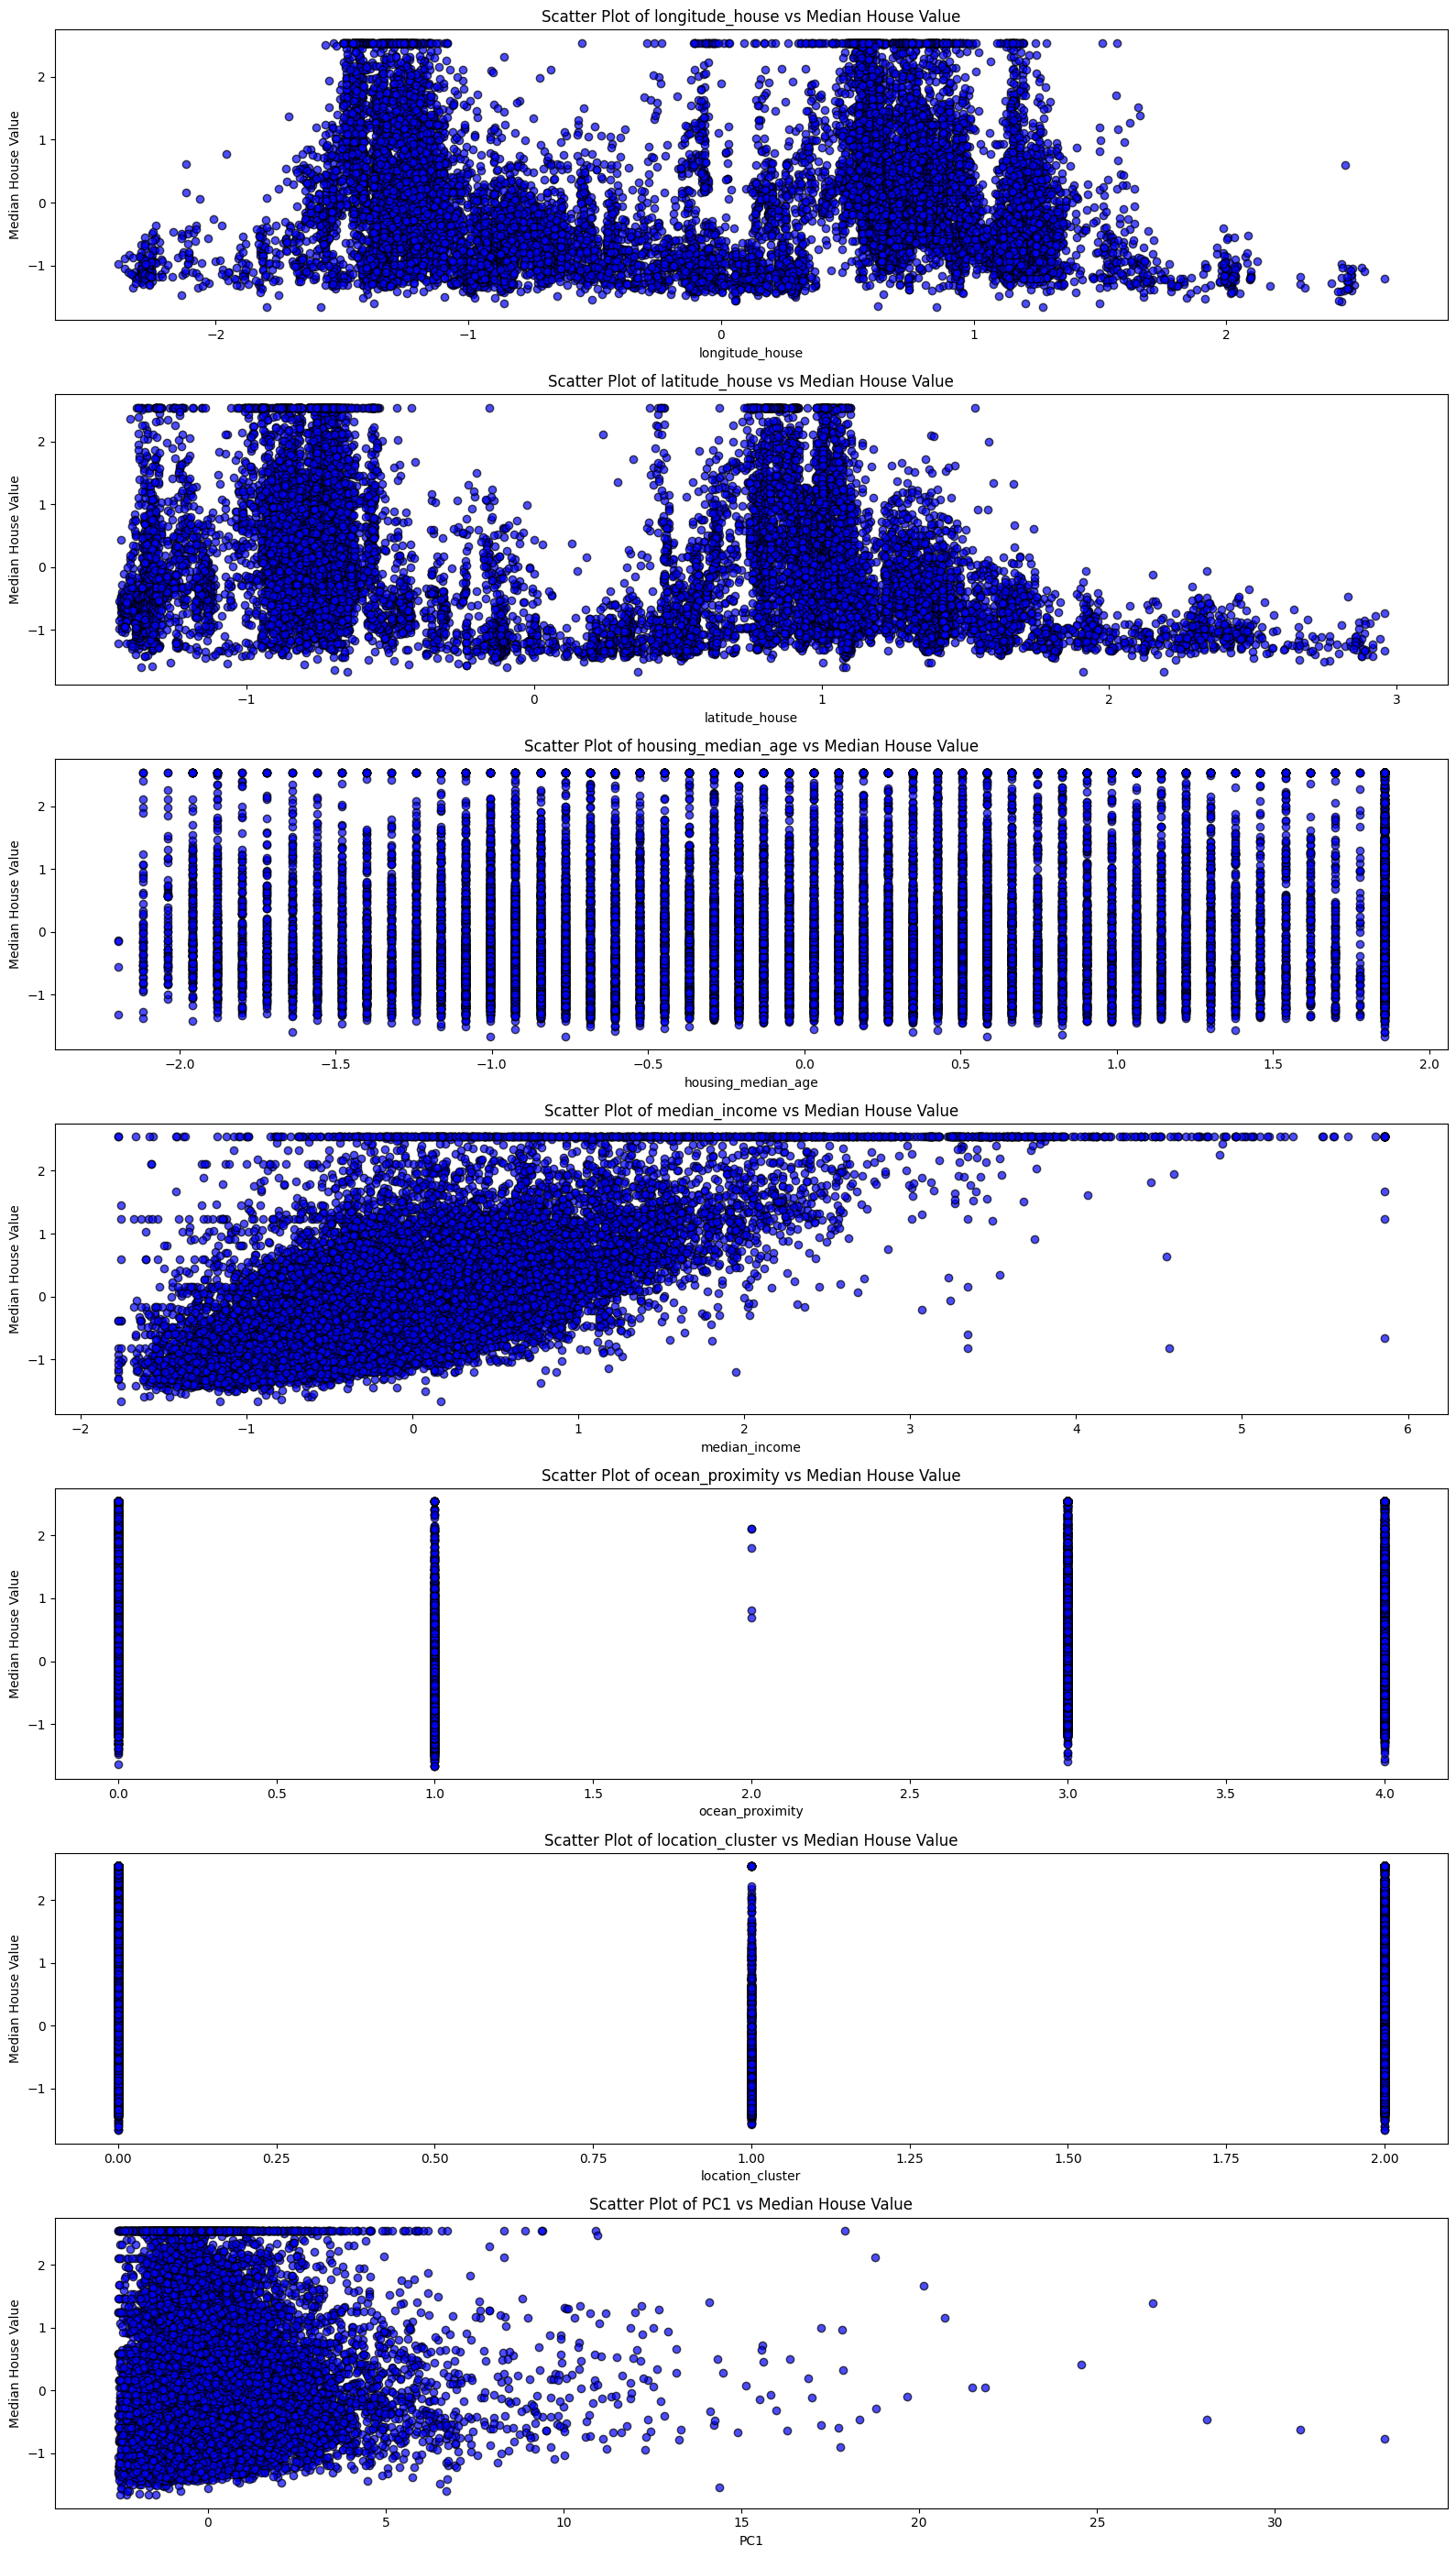

In [187]:
import matplotlib.pyplot as plt


# Assuming X is a DataFrame and y is a Series
def plot_scatter_for_all_features(X, y):
    num_features = X.shape[1]
    plt.figure(
        figsize=(16, num_features * 4)
    )  # Adjust figure size based on the number of features

    for i, column in enumerate(X.columns):
        plt.subplot(num_features, 1, i + 1)  # Create a subplot for each feature
        plt.scatter(X[column], y, color="blue", edgecolor="k", alpha=0.7)
        plt.xlabel(column)
        plt.ylabel("Median House Value")
        plt.title(f"Scatter Plot of {column} vs Median House Value")

    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()


# Example usage
plot_scatter_for_all_features(X, y)

In [ ]:
"""
Median Income (median_income) and PC1 show the most linear relationships with the target variable,
making them suitable for linear regression.

Longitude, Latitude, and Housing Median Age display non-linear patterns, so they might not contribute well
to a linear regression model. Consider transforming these variables or using non-linear models.

Categorical Variables like ocean_proximity and location_cluster should be handled appropriately
(e.g., one-hot encoding) before applying linear regression.
"""

In [ ]:
# shifting longitude_house

In [185]:
# training the linear regression model

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.40641604202697745
R^2 Score: 0.5870270948192502


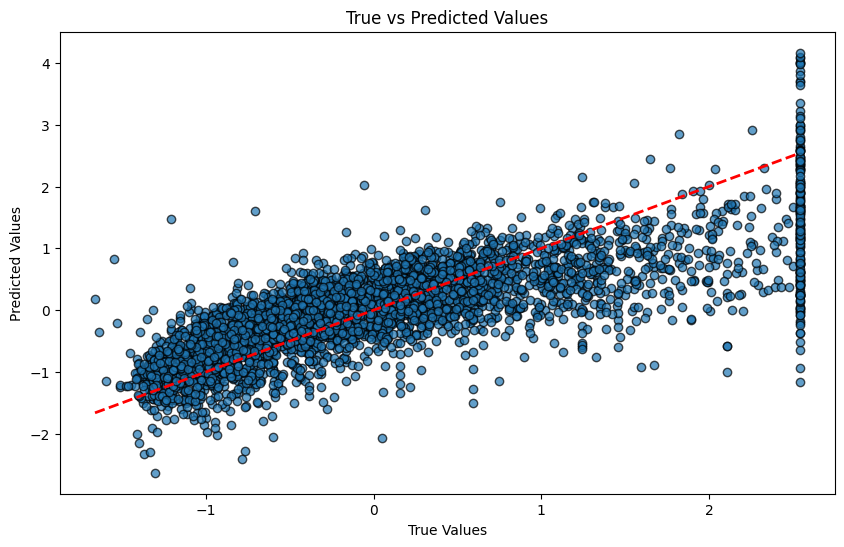

In [186]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor="k", alpha=0.7)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="red",
    linestyle="--",
    lw=2,
)
plt.show()